In [3]:
import sys
sys.path.append("../../src/earthtext")

import geopandas as gpd
import shapely as sh
from pyproj import CRS
epsg4326 = CRS.from_epsg(4326)
import pandas as pd
from progressbar import progressbar as pbar
import numpy as np
import matplotlib.pyplot as plt
import geoplot
import geoplot.crs as gcrs

from osm import osm


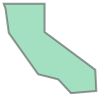

In [4]:
# load boundaries of California

cc = gpd.read_file("data/CA_State_TIGER2016.shp").to_crs(epsg4326)
c = cc.geometry[0]
c = list(c.geoms)[6].simplify(tolerance=.5)
caldf = gpd.GeoDataFrame(geometry=[c], crs=epsg4326)
c

## load query results with all OSM nodes on California

In [5]:
key = 'highway'
gg = gpd.read_parquet(f"data/california_osm_{key}.parquet")

## show counts of tags `natural` key, clipping at 10K (`tree` has ~ 320k occurrences)

In [6]:
gcc = gg[key].value_counts()
gcc.index = [f"{k} {v:8d}" for k,v in dict(gcc).items()]

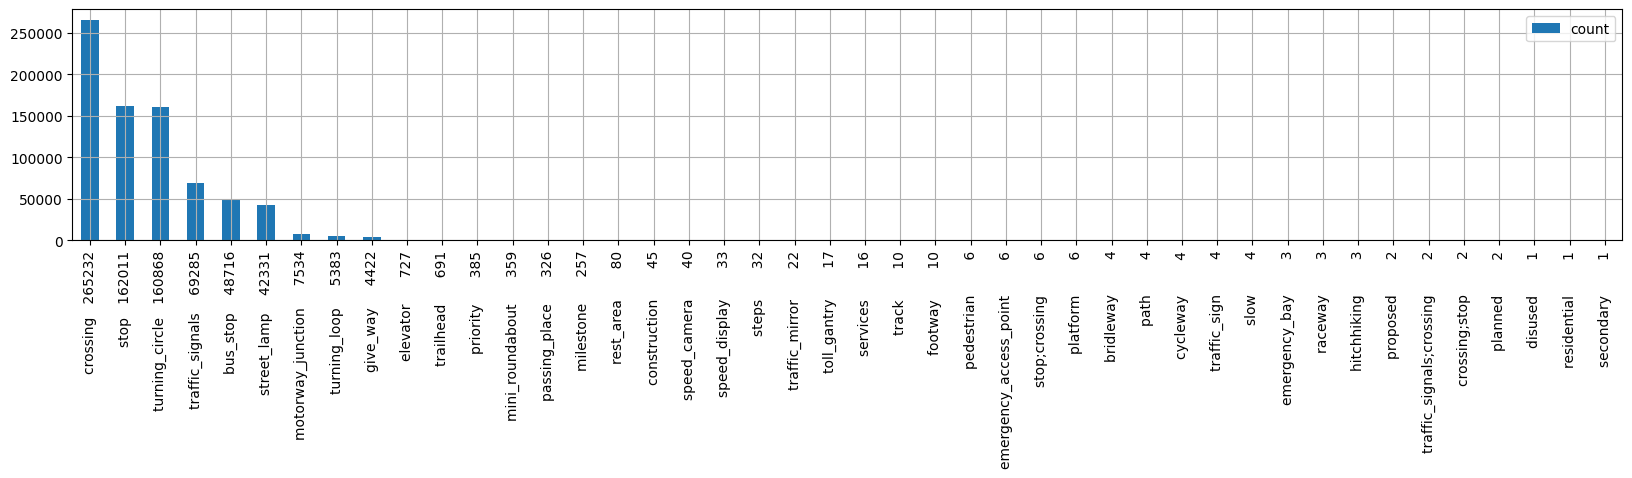

In [7]:
pd.DataFrame(gcc).plot(kind='bar', figsize=(20,3))
plt.grid()

In [8]:
gcc = gg[key].value_counts()

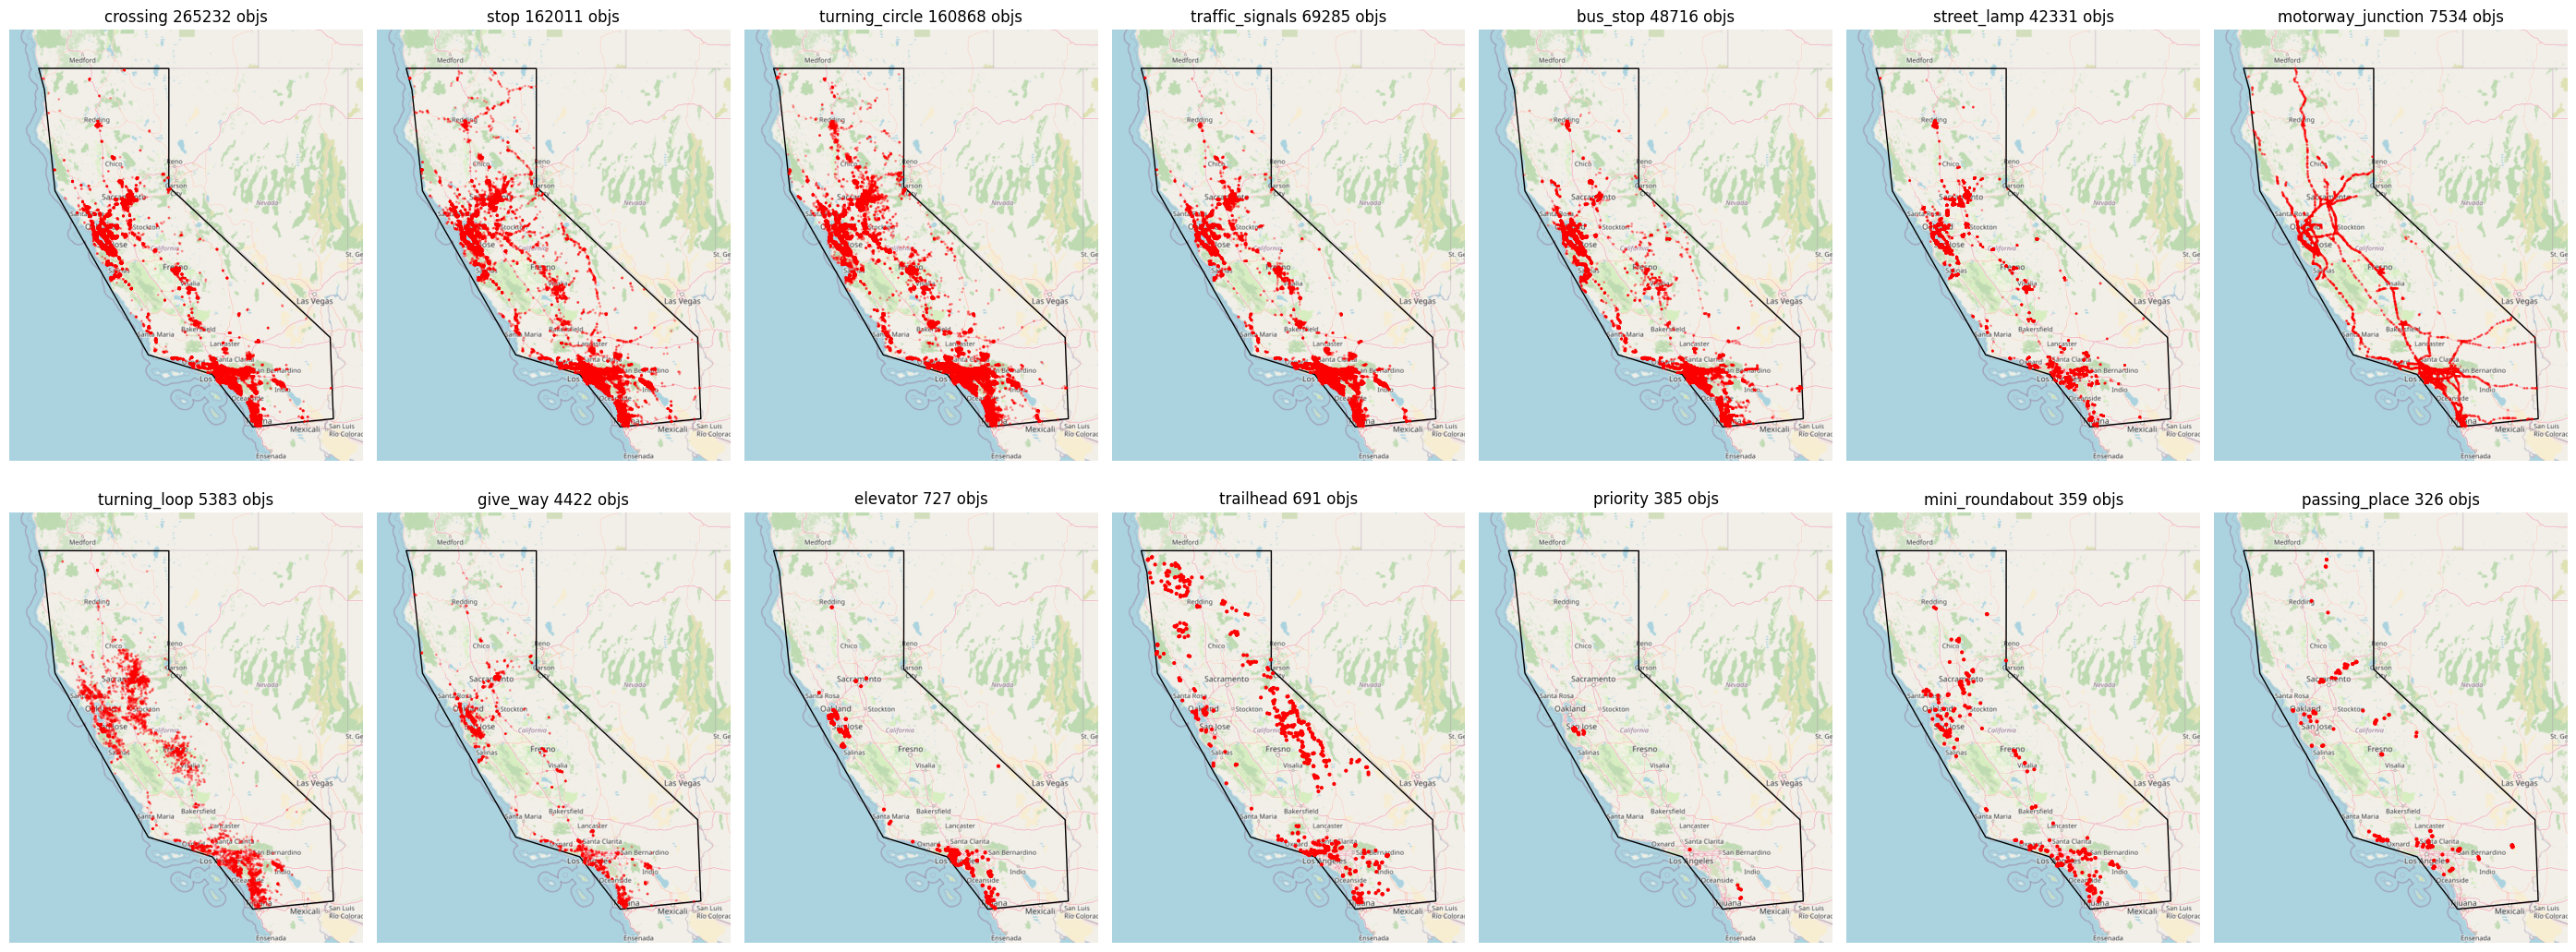

In [9]:

for ax,feature in osm.subplots(gcc.iloc[:14].index, n_cols=7, usizex=4, usizey=5.5, projection=gcrs.WebMercator()):
    x = gg[gg[key]==feature]
    lenx = len(x)
    if len(x)>50000: x=x.sample(50000)
    plt.title(f"{feature} {lenx} objs")
    geoplot.webmap(gpd.GeoDataFrame(geometry=[c], crs=epsg4326), ax=ax)
    alpha = 1 if len(x)<3000 else 0.3
    size = 2 if len(x)<3000 else 1
    geoplot.pointplot(x, ax=ax, alpha=alpha, s=size, color='red')
    geoplot.polyplot(caldf, ax=ax)


## show metadata of random nodes

In [11]:
for k in gcc.iloc[:14].index:
    x = gg[gg[key]==k].sample(1).iloc[0] 
    #x = pd.Series({k:v for k,v in dict(x).items() if v is not None and k!='geometry'})
    x = "\n".join([f"{k:20s} {v}" for k,v in dict(x).items() if v is not None and k!='geometry'])
    print (f"\n -- sample of '{k}' --\n", x)


 -- sample of 'crossing' --
 highway              crossing

 -- sample of 'stop' --
 highway              stop
direction            forward

 -- sample of 'turning_circle' --
 highway              turning_circle

 -- sample of 'traffic_signals' --
 highway              traffic_signals
traffic_signals:direction forward

 -- sample of 'bus_stop' --
 highway              bus_stop
ref                  51065
name                 High Street & San Jose Avenue
network              AC Transit
bus                  yes
public_transport     platform
operator             Alameda-Contra Costa Transit District
route_ref            W;OX;631;687
gtfs_id              0101650
gtfs_location_type   0
gtfs_stop_code       51065

 -- sample of 'street_lamp' --
 highway              street_lamp

 -- sample of 'motorway_junction' --
 highway              motorway_junction
noref                yes

 -- sample of 'turning_loop' --
 highway              turning_loop

 -- sample of 'give_way' --
 highway        